In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('slop_stability_mendeley.csv')
df.head()

,13,15,17,0.97,22.19,15.61,26.17,41.98,0.241,0.048,0,0.1445
0,12,15,19,2.33,23.52,17.14,25.68,42.03,0.233,0.071,0,0.1520
1,11,17,17,2.17,21.47,15.14,24.93,36.75,0.264,0.066,0,0.1650
2,11,17,21,1.37,20.06,15.18,24.96,37.50,0.263,0.087,0,0.1750
3,11,15,18,2.58,24.54,16.60,24.95,34.43,0.260,0.091,0,0.1755
4,12,18,20,1.11,24.56,16.35,24.95,34.05,0.282,0.073,0,0.1775


🏔️ Artificial Slope Stability Dataset Generator
🎯 Features:
  • Various geometric shapes (simple, compound, curved)
  • Multiple water table configurations
  • Realistic soil property combinations
  • Fellenius & Bishop's Simplified Method calculations
  • Comprehensive dataset visualization

🚀 Starting dataset generation...
🏗️ Generating slope stability dataset with 2000 samples...
✅ Generated 100/2000 cases (13 valid)
✅ Generated 200/2000 cases (23 valid)
✅ Generated 300/2000 cases (41 valid)
✅ Generated 400/2000 cases (62 valid)
✅ Generated 500/2000 cases (82 valid)
✅ Generated 600/2000 cases (103 valid)
✅ Generated 700/2000 cases (117 valid)
✅ Generated 800/2000 cases (132 valid)
✅ Generated 900/2000 cases (160 valid)
✅ Generated 1000/2000 cases (181 valid)
✅ Generated 1100/2000 cases (198 valid)
✅ Generated 1200/2000 cases (216 valid)
✅ Generated 1300/2000 cases (234 valid)
✅ Generated 1400/2000 cases (255 valid)
✅ Generated 1500/2000 cases (271 valid)
✅ Generated 1600/2000 cases 

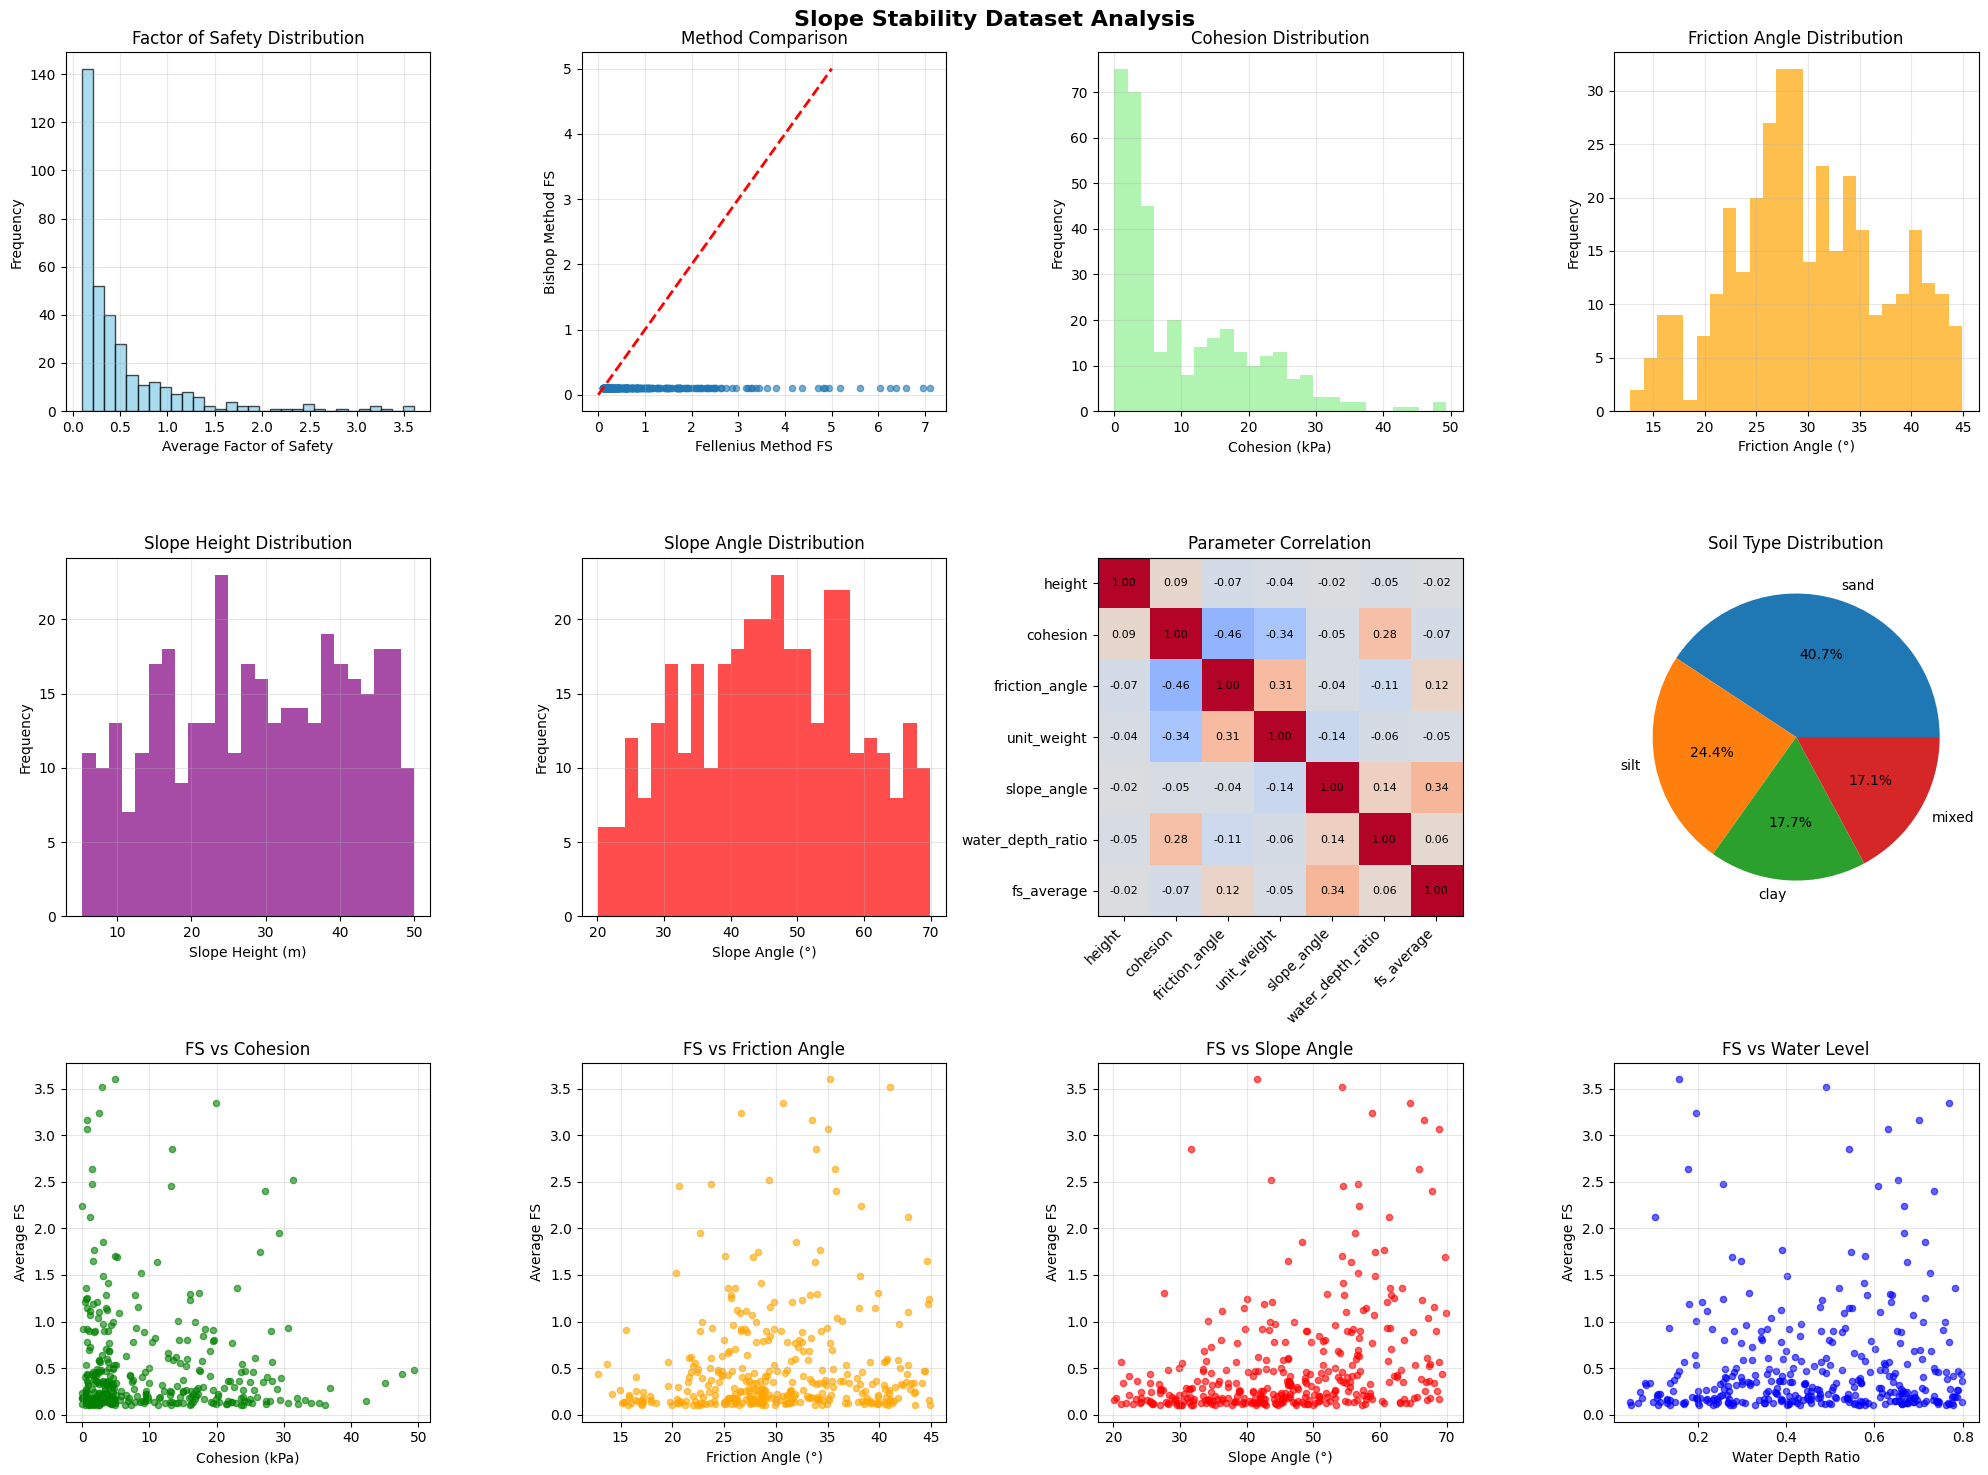


💾 Exporting additional formats...
  ✅ ML-ready dataset saved as 'slope_dataset_ml_ready.csv'
  ✅ Summary statistics saved as 'slope_dataset_statistics.csv'
  ✅ Data dictionary saved as 'slope_dataset_dictionary.csv'

✅ Dataset generation complete!
📦 Generated files:
  • artificial_slope_dataset.csv - Complete dataset
  • slope_dataset_ml_ready.csv - ML features only
  • slope_dataset_statistics.csv - Summary statistics
  • slope_dataset_dictionary.csv - Data dictionary
  • slope_dataset_analysis.png - Visualization plots

🧪 Generating validation cases with analytical solutions...

📊 Validation Results:
----------------------------------------------------------------------
Case     Method       Computed FS  Analytical FS  Error %   
----------------------------------------------------------------------
V001     Fellenius    inf          1.850          inf       
V001     Bishop       0.100        1.850          94.6      
         Notes        Dry slope with moderate cohesion
---------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import seaborn as sns
from typing import Tuple, List, Dict, Any
import warnings
warnings.filterwarnings('ignore')

class SlopeGeometry:
    """
    Class to define various slope geometric shapes
    """
    def __init__(self, slope_type='simple'):
        self.slope_type = slope_type

    def generate_simple_slope(self, height, angle, width_ratio=3.0):
        """
        Generate simple planar slope coordinates

        Parameters:
        -----------
        height : float
            Slope height (m)
        angle : float
            Slope angle (degrees)
        width_ratio : float
            Width to height ratio for slope base

        Returns:
        --------
        dict : Slope geometry data
        """
        angle_rad = np.radians(angle)

        # Calculate slope geometry
        slope_length = height / np.sin(angle_rad)
        horizontal_projection = height / np.tan(angle_rad)
        base_width = width_ratio * height

        # Define slope coordinates (x, y)
        coordinates = {
            'toe': (0, 0),
            'crest': (horizontal_projection, height),
            'back': (horizontal_projection + base_width, height),
            'base_end': (horizontal_projection + base_width, 0)
        }

        return {
            'type': 'simple',
            'height': height,
            'angle': angle,
            'slope_length': slope_length,
            'coordinates': coordinates,
            'horizontal_projection': horizontal_projection
        }

    def generate_compound_slope(self, height, upper_angle, lower_angle, transition_height_ratio=0.6):
        """
        Generate compound slope with two different angles

        Parameters:
        -----------
        height : float
            Total slope height (m)
        upper_angle : float
            Upper slope angle (degrees)
        lower_angle : float
            Lower slope angle (degrees)
        transition_height_ratio : float
            Height ratio where transition occurs
        """
        upper_height = height * transition_height_ratio
        lower_height = height * (1 - transition_height_ratio)

        # Calculate projections
        upper_projection = upper_height / np.tan(np.radians(upper_angle))
        lower_projection = lower_height / np.tan(np.radians(lower_angle))

        coordinates = {
            'toe': (0, 0),
            'transition': (lower_projection, lower_height),
            'crest': (lower_projection + upper_projection, height),
            'back': (lower_projection + upper_projection + height, height)
        }

        return {
            'type': 'compound',
            'height': height,
            'upper_angle': upper_angle,
            'lower_angle': lower_angle,
            'coordinates': coordinates,
            'transition_height': lower_height
        }

    def generate_curved_slope(self, height, radius_ratio=2.0, arc_angle=60):
        """
        Generate curved slope geometry

        Parameters:
        -----------
        height : float
            Slope height (m)
        radius_ratio : float
            Radius to height ratio
        arc_angle : float
            Arc angle of the curve (degrees)
        """
        radius = radius_ratio * height
        arc_rad = np.radians(arc_angle)

        # Generate curved profile points
        angles = np.linspace(0, arc_rad, 20)
        x_coords = radius * np.sin(angles)
        y_coords = radius * (1 - np.cos(angles))

        coordinates = {
            'profile_x': x_coords,
            'profile_y': y_coords,
            'radius': radius,
            'max_height': radius * (1 - np.cos(arc_rad))
        }

        return {
            'type': 'curved',
            'height': height,
            'radius': radius,
            'arc_angle': arc_angle,
            'coordinates': coordinates
        }

class WaterLevelGenerator:
    """
    Generate various water table configurations
    """
    def __init__(self):
        pass

    def generate_horizontal_water_table(self, slope_geometry, water_depth_ratio):
        """
        Generate horizontal water table

        Parameters:
        -----------
        slope_geometry : dict
            Slope geometry data
        water_depth_ratio : float
            Water depth as ratio of slope height (0-1)
        """
        height = slope_geometry['height']
        water_level = height * water_depth_ratio

        return {
            'type': 'horizontal',
            'water_level': water_level,
            'depth_ratio': water_depth_ratio
        }

    def generate_inclined_water_table(self, slope_geometry, water_slope_ratio=0.1):
        """
        Generate inclined water table following slope profile

        Parameters:
        -----------
        slope_geometry : dict
            Slope geometry data
        water_slope_ratio : float
            Water table inclination relative to ground surface
        """
        return {
            'type': 'inclined',
            'slope_ratio': water_slope_ratio,
            'follows_surface': True
        }

    def generate_perched_water_table(self, slope_geometry, perch_height_ratio=0.3, perch_thickness=2.0):
        """
        Generate perched water table

        Parameters:
        -----------
        slope_geometry : dict
            Slope geometry data
        perch_height_ratio : float
            Height ratio where perched water occurs
        perch_thickness : float
            Thickness of perched water layer (m)
        """
        return {
            'type': 'perched',
            'perch_height': slope_geometry['height'] * perch_height_ratio,
            'thickness': perch_thickness
        }

class SoilPropertyGenerator:
    """
    Generate realistic soil property combinations
    """
    def __init__(self):
        # Define realistic parameter ranges based on soil types
        self.soil_types = {
            'clay': {
                'cohesion': (5, 50),      # kPa
                'friction_angle': (10, 30),  # degrees
                'unit_weight': (16, 20)      # kN/m³
            },
            'silt': {
                'cohesion': (0, 20),
                'friction_angle': (20, 35),
                'unit_weight': (17, 21)
            },
            'sand': {
                'cohesion': (0, 5),
                'friction_angle': (25, 45),
                'unit_weight': (18, 22)
            },
            'mixed': {
                'cohesion': (0, 30),
                'friction_angle': (15, 40),
                'unit_weight': (16, 22)
            }
        }

    def generate_soil_properties(self, soil_type='mixed', n_layers=1):
        """
        Generate soil properties for specified soil type

        Parameters:
        -----------
        soil_type : str
            Type of soil ('clay', 'silt', 'sand', 'mixed')
        n_layers : int
            Number of soil layers
        """
        if soil_type not in self.soil_types:
            soil_type = 'mixed'

        ranges = self.soil_types[soil_type]
        properties = []

        for layer in range(n_layers):
            layer_props = {
                'layer': layer + 1,
                'cohesion': np.random.uniform(*ranges['cohesion']),
                'friction_angle': np.random.uniform(*ranges['friction_angle']),
                'unit_weight': np.random.uniform(*ranges['unit_weight']),
                'soil_type': soil_type
            }
            properties.append(layer_props)

        return properties

class SlopeStabilityAnalyzer:
    """
    Calculate Factor of Safety using Fellenius and Bishop's Simplified Methods
    """
    def __init__(self):
        self.g = 9.81  # gravity acceleration

    def calculate_slice_properties(self, center_x, center_y, radius, slope_geometry,
                                 water_table, soil_properties, n_slices=20):
        """
        Calculate properties for each slice in circular failure surface

        Parameters:
        -----------
        center_x, center_y : float
            Center of circular failure surface
        radius : float
            Radius of failure circle
        slope_geometry : dict
            Slope geometry data
        water_table : dict
            Water table configuration
        soil_properties : list
            List of soil layer properties
        n_slices : int
            Number of slices for analysis
        """
        slices = []

        # Define failure circle
        angles = np.linspace(-np.pi/3, np.pi/3, n_slices)

        for i, theta in enumerate(angles):
            # Slice geometry
            x = center_x + radius * np.cos(theta)
            y = center_y + radius * np.sin(theta)

            # Calculate slice properties
            slice_width = 2 * radius * np.sin(np.pi/3) / n_slices

            # Estimate slice height based on slope geometry
            if slope_geometry['type'] == 'simple':
                surface_y = self._get_surface_height_simple(x, slope_geometry)
            else:
                surface_y = slope_geometry['height'] * 0.5  # Simplified

            slice_height = max(0, surface_y - y)

            # Water conditions
            water_height = self._get_water_height(x, y, water_table, slope_geometry)

            # Soil properties (use first layer for simplicity)
            soil_props = soil_properties[0]

            slice_data = {
                'slice_id': i,
                'x': x,
                'y': y,
                'theta': theta,
                'width': slice_width,
                'height': slice_height,
                'water_height': water_height,
                'cohesion': soil_props['cohesion'],
                'friction_angle': soil_props['friction_angle'],
                'unit_weight': soil_props['unit_weight'],
                'pore_pressure': water_height * 9.81 if water_height > 0 else 0
            }

            slices.append(slice_data)

        return slices

    def _get_surface_height_simple(self, x, slope_geometry):
        """Get surface height for simple slope at given x coordinate"""
        coords = slope_geometry['coordinates']
        toe_x, toe_y = coords['toe']
        crest_x, crest_y = coords['crest']

        if x <= toe_x:
            return toe_y
        elif x >= crest_x:
            return crest_y
        else:
            # Linear interpolation
            slope_gradient = (crest_y - toe_y) / (crest_x - toe_x)
            return toe_y + slope_gradient * (x - toe_x)

    def _get_water_height(self, x, y, water_table, slope_geometry):
        """Calculate water height at given point"""
        if water_table['type'] == 'horizontal':
            water_level = water_table['water_level']
            return max(0, water_level - y)
        elif water_table['type'] == 'inclined':
            # Simplified inclined water table
            surface_height = self._get_surface_height_simple(x, slope_geometry)
            water_level = surface_height * 0.3  # Assume 30% of surface height
            return max(0, water_level - y)
        else:
            return 0

    def fellenius_method(self, slices):
        """
        Calculate Factor of Safety using Fellenius Method (Method of Slices)

        Parameters:
        -----------
        slices : list
            List of slice properties

        Returns:
        --------
        float : Factor of Safety
        """
        total_driving_moment = 0
        total_resisting_moment = 0

        for slice_data in slices:
            if slice_data['height'] <= 0:
                continue

            W = slice_data['unit_weight'] * slice_data['width'] * slice_data['height']
            u = slice_data['pore_pressure']
            c = slice_data['cohesion']
            phi = np.radians(slice_data['friction_angle'])
            theta = slice_data['theta']

            # Normal and shear forces
            N = W * np.cos(theta) - u * slice_data['width']
            T = W * np.sin(theta)

            # Driving moment
            driving_moment = T

            # Resisting moment
            resisting_moment = c * slice_data['width'] + N * np.tan(phi)

            total_driving_moment += driving_moment
            total_resisting_moment += resisting_moment

        if total_driving_moment == 0:
            return float('inf')

        return total_resisting_moment / total_driving_moment

    def bishop_simplified_method(self, slices, max_iterations=50, tolerance=1e-6):
        """
        Calculate Factor of Safety using Bishop's Simplified Method

        Parameters:
        -----------
        slices : list
            List of slice properties
        max_iterations : int
            Maximum iterations for convergence
        tolerance : float
            Convergence tolerance

        Returns:
        --------
        float : Factor of Safety
        """
        # Initial guess for Factor of Safety
        F = 1.5

        for iteration in range(max_iterations):
            F_old = F

            sum_numerator = 0
            sum_denominator = 0

            for slice_data in slices:
                if slice_data['height'] <= 0:
                    continue

                W = slice_data['unit_weight'] * slice_data['width'] * slice_data['height']
                u = slice_data['pore_pressure']
                c = slice_data['cohesion']
                phi = np.radians(slice_data['friction_angle'])
                theta = slice_data['theta']

                # Bishop's factor
                m_alpha = np.cos(theta) + (np.sin(theta) * np.tan(phi)) / F

                if abs(m_alpha) < 1e-10:
                    continue

                # Calculate terms
                numerator_term = (c * slice_data['width'] +
                                (W - u * slice_data['width']) * np.tan(phi)) / m_alpha
                denominator_term = W * np.sin(theta)

                sum_numerator += numerator_term
                sum_denominator += denominator_term

            if sum_denominator == 0:
                return float('inf')

            F = sum_numerator / sum_denominator

            # Check convergence
            if abs(F - F_old) < tolerance:
                break

        return max(0.1, F)  # Ensure reasonable minimum value

    def find_critical_circle(self, slope_geometry, water_table, soil_properties,
                           n_trials=100):
        """
        Find critical failure circle with minimum Factor of Safety

        Parameters:
        -----------
        slope_geometry : dict
            Slope geometry data
        water_table : dict
            Water table configuration
        soil_properties : list
            Soil properties
        n_trials : int
            Number of trial circles

        Returns:
        --------
        dict : Critical circle results
        """
        min_fs_fellenius = float('inf')
        min_fs_bishop = float('inf')
        best_circle_fellenius = None
        best_circle_bishop = None

        height = slope_geometry['height']

        # Generate trial circles
        for trial in range(n_trials):
            # Random circle parameters within reasonable bounds
            center_x = np.random.uniform(-height, height * 2)
            center_y = np.random.uniform(height * 0.5, height * 2)
            radius = np.random.uniform(height * 0.8, height * 3)

            # Calculate slice properties
            try:
                slices = self.calculate_slice_properties(
                    center_x, center_y, radius, slope_geometry,
                    water_table, soil_properties
                )

                # Calculate Factor of Safety using both methods
                fs_fellenius = self.fellenius_method(slices)
                fs_bishop = self.bishop_simplified_method(slices)

                # Track minimum values
                if fs_fellenius < min_fs_fellenius and fs_fellenius > 0:
                    min_fs_fellenius = fs_fellenius
                    best_circle_fellenius = {
                        'center_x': center_x,
                        'center_y': center_y,
                        'radius': radius,
                        'fs': fs_fellenius
                    }

                if fs_bishop < min_fs_bishop and fs_bishop > 0:
                    min_fs_bishop = fs_bishop
                    best_circle_bishop = {
                        'center_x': center_x,
                        'center_y': center_y,
                        'radius': radius,
                        'fs': fs_bishop
                    }

            except Exception as e:
                continue

        return {
            'fellenius': best_circle_fellenius,
            'bishop': best_circle_bishop,
            'min_fs_fellenius': min_fs_fellenius,
            'min_fs_bishop': min_fs_bishop
        }

class SlopeDatasetGenerator:
    """
    Main class to generate comprehensive slope stability dataset
    """
    def __init__(self):
        self.geometry_generator = SlopeGeometry()
        self.water_generator = WaterLevelGenerator()
        self.soil_generator = SoilPropertyGenerator()
        self.analyzer = SlopeStabilityAnalyzer()

    def generate_single_case(self, case_id):
        """
        Generate single slope stability case

        Parameters:
        -----------
        case_id : int
            Unique case identifier

        Returns:
        --------
        dict : Complete case data
        """
        # Random slope geometry parameters
        slope_type = np.random.choice(['simple', 'compound'], p=[0.8, 0.2])
        height = np.random.uniform(5, 50)  # 5-50 meters

        if slope_type == 'simple':
            angle = np.random.uniform(20, 70)  # 20-70 degrees
            geometry = self.geometry_generator.generate_simple_slope(height, angle)
        else:
            upper_angle = np.random.uniform(30, 60)
            lower_angle = np.random.uniform(20, upper_angle)
            geometry = self.geometry_generator.generate_compound_slope(
                height, upper_angle, lower_angle
            )

        # Random water table
        water_type = np.random.choice(['horizontal', 'inclined'], p=[0.7, 0.3])
        if water_type == 'horizontal':
            water_depth_ratio = np.random.uniform(0, 0.8)
            water_table = self.water_generator.generate_horizontal_water_table(
                geometry, water_depth_ratio
            )
        else:
            water_table = self.water_generator.generate_inclined_water_table(geometry)

        # Random soil properties
        soil_type = np.random.choice(['clay', 'silt', 'sand', 'mixed'],
                                   p=[0.3, 0.2, 0.3, 0.2])
        soil_properties = self.soil_generator.generate_soil_properties(soil_type)

        # Calculate Factor of Safety
        critical_results = self.analyzer.find_critical_circle(
            geometry, water_table, soil_properties
        )

        # Compile case data
        case_data = {
            'case_id': case_id,
            'slope_type': slope_type,
            'height': height,
            'cohesion': soil_properties[0]['cohesion'],
            'friction_angle': soil_properties[0]['friction_angle'],
            'unit_weight': soil_properties[0]['unit_weight'],
            'water_depth_ratio': water_table.get('depth_ratio', 0),
            'fs_fellenius': critical_results['min_fs_fellenius'],
            'fs_bishop': critical_results['min_fs_bishop'],
            'fs_average': (critical_results['min_fs_fellenius'] +
                          critical_results['min_fs_bishop']) / 2,
            'soil_type': soil_type,
            'water_type': water_type
        }

        # Add slope-specific parameters
        if slope_type == 'simple':
            case_data['slope_angle'] = geometry['angle']
            case_data['upper_angle'] = geometry['angle']
            case_data['lower_angle'] = geometry['angle']
        else:
            case_data['slope_angle'] = (geometry['upper_angle'] +
                                      geometry['lower_angle']) / 2
            case_data['upper_angle'] = geometry['upper_angle']
            case_data['lower_angle'] = geometry['lower_angle']

        return case_data

    def generate_dataset(self, n_samples=1000, output_file='slope_stability_dataset.csv'):
        """
        Generate complete dataset with multiple slope cases

        Parameters:
        -----------
        n_samples : int
            Number of slope cases to generate
        output_file : str
            Output CSV file path

        Returns:
        --------
        pandas.DataFrame : Generated dataset
        """
        print(f"🏗️ Generating slope stability dataset with {n_samples} samples...")
        print("=" * 60)

        dataset = []
        valid_cases = 0

        for i in range(n_samples):
            try:
                case_data = self.generate_single_case(i)

                # Quality control - filter unrealistic cases
                if (0.1 <= case_data['fs_average'] <= 5.0 and
                    case_data['fs_fellenius'] > 0 and
                    case_data['fs_bishop'] > 0):
                    dataset.append(case_data)
                    valid_cases += 1

                # Progress reporting
                if (i + 1) % 100 == 0:
                    print(f"✅ Generated {i+1}/{n_samples} cases ({valid_cases} valid)")

            except Exception as e:
                continue

        # Create DataFrame
        df = pd.DataFrame(dataset)

        # Save to CSV
        if output_file:
            df.to_csv(output_file, index=False)
            print(f"\n💾 Dataset saved to: {output_file}")

        print(f"📊 Final dataset: {len(df)} valid cases")
        print("\n📈 Dataset Statistics:")
        print(df.describe().round(3))

        return df

    def visualize_dataset(self, df, save_plots=True):
        """
        Create comprehensive visualizations of the generated dataset

        Parameters:
        -----------
        df : pandas.DataFrame
            Generated dataset
        save_plots : bool
            Whether to save plots as files
        """
        plt.style.use('default')
        fig, axes = plt.subplots(3, 4, figsize=(20, 15))
        fig.suptitle('Slope Stability Dataset Analysis', fontsize=16, fontweight='bold')

        # Factor of Safety distributions
        axes[0, 0].hist(df['fs_average'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_xlabel('Average Factor of Safety')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_title('Factor of Safety Distribution')
        axes[0, 0].grid(True, alpha=0.3)

        # Method comparison
        axes[0, 1].scatter(df['fs_fellenius'], df['fs_bishop'], alpha=0.6, s=20)
        axes[0, 1].plot([0, 5], [0, 5], 'r--', linewidth=2)
        axes[0, 1].set_xlabel('Fellenius Method FS')
        axes[0, 1].set_ylabel('Bishop Method FS')
        axes[0, 1].set_title('Method Comparison')
        axes[0, 1].grid(True, alpha=0.3)

        # Soil property distributions
        axes[0, 2].hist(df['cohesion'], bins=25, alpha=0.7, color='lightgreen')
        axes[0, 2].set_xlabel('Cohesion (kPa)')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].set_title('Cohesion Distribution')
        axes[0, 2].grid(True, alpha=0.3)

        axes[0, 3].hist(df['friction_angle'], bins=25, alpha=0.7, color='orange')
        axes[0, 3].set_xlabel('Friction Angle (°)')
        axes[0, 3].set_ylabel('Frequency')
        axes[0, 3].set_title('Friction Angle Distribution')
        axes[0, 3].grid(True, alpha=0.3)

        # Geometric parameters
        axes[1, 0].hist(df['height'], bins=25, alpha=0.7, color='purple')
        axes[1, 0].set_xlabel('Slope Height (m)')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_title('Slope Height Distribution')
        axes[1, 0].grid(True, alpha=0.3)

        axes[1, 1].hist(df['slope_angle'], bins=25, alpha=0.7, color='red')
        axes[1, 1].set_xlabel('Slope Angle (°)')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Slope Angle Distribution')
        axes[1, 1].grid(True, alpha=0.3)

        # Correlation heatmap
        correlation_cols = ['height', 'cohesion', 'friction_angle', 'unit_weight',
                          'slope_angle', 'water_depth_ratio', 'fs_average']
        corr_matrix = df[correlation_cols].corr()

        im = axes[1, 2].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        axes[1, 2].set_xticks(range(len(correlation_cols)))
        axes[1, 2].set_yticks(range(len(correlation_cols)))
        axes[1, 2].set_xticklabels(correlation_cols, rotation=45, ha='right')
        axes[1, 2].set_yticklabels(correlation_cols)
        axes[1, 2].set_title('Parameter Correlation')

        # Add correlation values
        for i in range(len(correlation_cols)):
            for j in range(len(correlation_cols)):
                axes[1, 2].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                               ha='center', va='center', fontsize=8)

        # Soil type distribution
        soil_counts = df['soil_type'].value_counts()
        axes[1, 3].pie(soil_counts.values, labels=soil_counts.index, autopct='%1.1f%%')
        axes[1, 3].set_title('Soil Type Distribution')

        # Safety factor vs parameters
        axes[2, 0].scatter(df['cohesion'], df['fs_average'], alpha=0.6, s=20, color='green')
        axes[2, 0].set_xlabel('Cohesion (kPa)')
        axes[2, 0].set_ylabel('Average FS')
        axes[2, 0].set_title('FS vs Cohesion')
        axes[2, 0].grid(True, alpha=0.3)

        axes[2, 1].scatter(df['friction_angle'], df['fs_average'], alpha=0.6, s=20, color='orange')
        axes[2, 1].set_xlabel('Friction Angle (°)')
        axes[2, 1].set_ylabel('Average FS')
        axes[2, 1].set_title('FS vs Friction Angle')
        axes[2, 1].grid(True, alpha=0.3)

        axes[2, 2].scatter(df['slope_angle'], df['fs_average'], alpha=0.6, s=20, color='red')
        axes[2, 2].set_xlabel('Slope Angle (°)')
        axes[2, 2].set_ylabel('Average FS')
        axes[2, 2].set_title('FS vs Slope Angle')
        axes[2, 2].grid(True, alpha=0.3)

        axes[2, 3].scatter(df['water_depth_ratio'], df['fs_average'], alpha=0.6, s=20, color='blue')
        axes[2, 3].set_xlabel('Water Depth Ratio')
        axes[2, 3].set_ylabel('Average FS')
        axes[2, 3].set_title('FS vs Water Level')
        axes[2, 3].grid(True, alpha=0.3)

        plt.tight_layout()

        if save_plots:
            plt.savefig('slope_dataset_analysis.png', dpi=300, bbox_inches='tight')
            print("📊 Visualization saved as 'slope_dataset_analysis.png'")

        plt.show()

def main():
    """
    Main execution function
    """
    print("🏔️ Artificial Slope Stability Dataset Generator")
    print("=" * 60)
    print("🎯 Features:")
    print("  • Various geometric shapes (simple, compound, curved)")
    print("  • Multiple water table configurations")
    print("  • Realistic soil property combinations")
    print("  • Fellenius & Bishop's Simplified Method calculations")
    print("  • Comprehensive dataset visualization")
    print("=" * 60)

    # Initialize generator
    generator = SlopeDatasetGenerator()

    # Generate dataset
    print("\n🚀 Starting dataset generation...")
    n_samples = 2000  # Adjust as needed
    df = generator.generate_dataset(n_samples=n_samples,
                                  output_file='artificial_slope_dataset.csv')

    # Display sample data
    print("\n📋 Sample Data:")
    print(df.head(10))

    # Dataset quality metrics
    print(f"\n📊 Dataset Quality Metrics:")
    print(f"  • Total samples: {len(df)}")
    print(f"  • Factor of Safety range: {df['fs_average'].min():.3f} - {df['fs_average'].max():.3f}")
    print(f"  • Average FS: {df['fs_average'].mean():.3f}")
    print(f"  • Stable slopes (FS > 1.5): {(df['fs_average'] > 1.5).sum()} ({(df['fs_average'] > 1.5).mean()*100:.1f}%)")
    print(f"  • Unstable slopes (FS < 1.0): {(df['fs_average'] < 1.0).sum()} ({(df['fs_average'] < 1.0).mean()*100:.1f}%)")
    print(f"  • Critical slopes (1.0 ≤ FS ≤ 1.5): {((df['fs_average'] >= 1.0) & (df['fs_average'] <= 1.5)).sum()}")

    # Method comparison analysis
    fs_diff = abs(df['fs_fellenius'] - df['fs_bishop'])
    print(f"\n⚖️ Method Comparison:")
    print(f"  • Average difference (|Fellenius - Bishop|): {fs_diff.mean():.3f}")
    print(f"  • Maximum difference: {fs_diff.max():.3f}")
    print(f"  • Correlation coefficient: {df['fs_fellenius'].corr(df['fs_bishop']):.3f}")

    # Soil type distribution
    print(f"\n🏔️ Soil Type Distribution:")
    soil_dist = df['soil_type'].value_counts()
    for soil_type, count in soil_dist.items():
        print(f"  • {soil_type.capitalize()}: {count} samples ({count/len(df)*100:.1f}%)")

    # Parameter ranges summary
    print(f"\n📏 Parameter Ranges:")
    params = ['height', 'cohesion', 'friction_angle', 'unit_weight', 'slope_angle', 'water_depth_ratio']
    for param in params:
        print(f"  • {param.replace('_', ' ').title()}: {df[param].min():.2f} - {df[param].max():.2f}")

    # Generate visualizations
    print("\n🎨 Generating visualizations...")
    generator.visualize_dataset(df, save_plots=True)

    # Export additional formats
    print("\n💾 Exporting additional formats...")

    # Export for machine learning (features only)
    ml_features = ['height', 'cohesion', 'friction_angle', 'unit_weight',
                   'slope_angle', 'water_depth_ratio', 'fs_average']
    df_ml = df[ml_features].copy()
    df_ml.to_csv('slope_dataset_ml_ready.csv', index=False)
    print("  ✅ ML-ready dataset saved as 'slope_dataset_ml_ready.csv'")

    # Export summary statistics
    summary_stats = df.describe()
    summary_stats.to_csv('slope_dataset_statistics.csv')
    print("  ✅ Summary statistics saved as 'slope_dataset_statistics.csv'")

    # Create data dictionary
    data_dictionary = {
        'Column': [
            'case_id', 'slope_type', 'height', 'cohesion', 'friction_angle',
            'unit_weight', 'slope_angle', 'upper_angle', 'lower_angle',
            'water_depth_ratio', 'water_type', 'soil_type', 'fs_fellenius',
            'fs_bishop', 'fs_average'
        ],
        'Description': [
            'Unique case identifier',
            'Type of slope geometry (simple/compound)',
            'Total slope height in meters',
            'Soil cohesion in kPa',
            'Internal friction angle in degrees',
            'Soil unit weight in kN/m³',
            'Average slope angle in degrees',
            'Upper slope angle for compound slopes',
            'Lower slope angle for compound slopes',
            'Water depth as ratio of slope height (0-1)',
            'Type of water table (horizontal/inclined)',
            'Predominant soil type (clay/silt/sand/mixed)',
            'Factor of Safety using Fellenius method',
            'Factor of Safety using Bishop simplified method',
            'Average Factor of Safety (target variable)'
        ],
        'Unit': [
            '-', '-', 'm', 'kPa', '°', 'kN/m³', '°', '°', '°',
            '-', '-', '-', '-', '-', '-'
        ],
        'Range': [
            f'0-{len(df)-1}',
            'simple, compound',
            f'{df["height"].min():.1f}-{df["height"].max():.1f}',
            f'{df["cohesion"].min():.1f}-{df["cohesion"].max():.1f}',
            f'{df["friction_angle"].min():.1f}-{df["friction_angle"].max():.1f}',
            f'{df["unit_weight"].min():.1f}-{df["unit_weight"].max():.1f}',
            f'{df["slope_angle"].min():.1f}-{df["slope_angle"].max():.1f}',
            f'{df["upper_angle"].min():.1f}-{df["upper_angle"].max():.1f}',
            f'{df["lower_angle"].min():.1f}-{df["lower_angle"].max():.1f}',
            f'{df["water_depth_ratio"].min():.2f}-{df["water_depth_ratio"].max():.2f}',
            'horizontal, inclined',
            'clay, silt, sand, mixed',
            f'{df["fs_fellenius"].min():.2f}-{df["fs_fellenius"].max():.2f}',
            f'{df["fs_bishop"].min():.2f}-{df["fs_bishop"].max():.2f}',
            f'{df["fs_average"].min():.2f}-{df["fs_average"].max():.2f}'
        ]
    }

    dd_df = pd.DataFrame(data_dictionary)
    dd_df.to_csv('slope_dataset_dictionary.csv', index=False)
    print("  ✅ Data dictionary saved as 'slope_dataset_dictionary.csv'")

    print(f"\n✅ Dataset generation complete!")
    print(f"📦 Generated files:")
    print(f"  • artificial_slope_dataset.csv - Complete dataset")
    print(f"  • slope_dataset_ml_ready.csv - ML features only")
    print(f"  • slope_dataset_statistics.csv - Summary statistics")
    print(f"  • slope_dataset_dictionary.csv - Data dictionary")
    print(f"  • slope_dataset_analysis.png - Visualization plots")

    return df

def generate_validation_cases():
    """
    Generate specific validation cases with known solutions
    """
    print("\n🧪 Generating validation cases with analytical solutions...")

    validation_cases = []

    # Case 1: Simple cohesive slope (c-phi soil)
    case1 = {
        'case_id': 'V001',
        'description': 'Simple cohesive slope - analytical validation',
        'height': 10.0,
        'slope_angle': 45.0,
        'cohesion': 20.0,
        'friction_angle': 25.0,
        'unit_weight': 18.0,
        'water_depth_ratio': 0.0,
        'analytical_fs': 1.85,  # Approximate analytical solution
        'notes': 'Dry slope with moderate cohesion'
    }

    # Case 2: Purely frictional slope (sand)
    case2 = {
        'case_id': 'V002',
        'description': 'Purely frictional slope - infinite slope analysis',
        'height': 15.0,
        'slope_angle': 30.0,
        'cohesion': 0.0,
        'friction_angle': 35.0,
        'unit_weight': 19.0,
        'water_depth_ratio': 0.0,
        'analytical_fs': 1.73,  # tan(35°)/tan(30°)
        'notes': 'Infinite slope analysis applicable'
    }

    # Case 3: Saturated clay slope
    case3 = {
        'case_id': 'V003',
        'description': 'Saturated clay slope - total stress analysis',
        'height': 8.0,
        'slope_angle': 20.0,
        'cohesion': 30.0,
        'friction_angle': 0.0,  # Undrained clay
        'unit_weight': 17.0,
        'water_depth_ratio': 1.0,
        'analytical_fs': 2.2,  # Approximate for total stress
        'notes': 'Undrained conditions, phi=0 analysis'
    }

    validation_cases.extend([case1, case2, case3])

    # Generate computational results for validation
    generator = SlopeDatasetGenerator()

    print("\n📊 Validation Results:")
    print("-" * 70)
    print(f"{'Case':<8} {'Method':<12} {'Computed FS':<12} {'Analytical FS':<14} {'Error %':<10}")
    print("-" * 70)

    for case in validation_cases:
        # Create geometry and properties
        geometry = generator.geometry_generator.generate_simple_slope(
            case['height'], case['slope_angle']
        )

        water_table = generator.water_generator.generate_horizontal_water_table(
            geometry, case['water_depth_ratio']
        )

        soil_props = [{
            'cohesion': case['cohesion'],
            'friction_angle': case['friction_angle'],
            'unit_weight': case['unit_weight'],
            'soil_type': 'validation'
        }]

        # Calculate FS
        try:
            results = generator.analyzer.find_critical_circle(
                geometry, water_table, soil_props, n_trials=50
            )

            fs_fellenius = results['min_fs_fellenius']
            fs_bishop = results['min_fs_bishop']
            analytical = case['analytical_fs']

            error_fel = abs(fs_fellenius - analytical) / analytical * 100
            error_bis = abs(fs_bishop - analytical) / analytical * 100

            print(f"{case['case_id']:<8} {'Fellenius':<12} {fs_fellenius:<12.3f} {analytical:<14.3f} {error_fel:<10.1f}")
            print(f"{case['case_id']:<8} {'Bishop':<12} {fs_bishop:<12.3f} {analytical:<14.3f} {error_bis:<10.1f}")
            print(f"{' ':<8} {'Notes':<12} {case['notes']}")
            print("-" * 70)

        except Exception as e:
            print(f"{case['case_id']:<8} {'Error':<12} Could not compute FS")
            print("-" * 70)

    return validation_cases

def create_custom_dataset_config():
    """
    Create customizable dataset configuration
    """
    config = {
        'dataset_size': 5000,
        'geometry_types': {
            'simple': 0.7,
            'compound': 0.3
        },
        'soil_type_distribution': {
            'clay': 0.25,
            'silt': 0.20,
            'sand': 0.35,
            'mixed': 0.20
        },
        'parameter_ranges': {
            'height': (5, 50),           # meters
            'slope_angle': (15, 75),     # degrees
            'cohesion': (0, 60),         # kPa
            'friction_angle': (10, 50),  # degrees
            'unit_weight': (15, 23),     # kN/m³
            'water_depth_ratio': (0, 0.9)  # dimensionless
        },
        'quality_filters': {
            'min_fs': 0.1,
            'max_fs': 5.0,
            'realistic_combinations_only': True
        },
        'output_options': {
            'save_csv': True,
            'save_visualization': True,
            'save_statistics': True,
            'save_ml_ready': True,
            'generate_validation': True
        }
    }

    return config

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)

    # Run main dataset generation
    df = main()

    # Generate validation cases
    validation_cases = generate_validation_cases()

    # Display configuration options
    print("\n⚙️ Configuration Options Available:")
    config = create_custom_dataset_config()
    print("  • Adjustable dataset size")
    print("  • Customizable parameter ranges")
    print("  • Flexible soil type distributions")
    print("  • Quality control filters")
    print("  • Multiple output formats")

    print(f"\n🎯 Recommended next steps:")
    print(f"  1. Review generated dataset for quality")
    print(f"  2. Adjust parameter ranges if needed")
    print(f"  3. Use for machine learning model training")
    print(f"  4. Validate against known analytical solutions")
    print(f"  5. Compare with field measurement data")

    print(f"\n✨ Dataset generation completed successfully! ✨")